<a href="https://colab.research.google.com/github/Bhavya-Mistry/Data-Science/blob/main/DecisionTree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [66]:

feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_cols]
y = df['Species']

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=224)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()

fitting = dc.fit(x_train,y_train)

In [69]:
from sklearn import metrics

y_pred = dc.predict(x_test)

print("Accuract:",metrics.accuracy_score(y_test,y_pred  )*100)

Accuract: 97.05882352941177


In [70]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(fitting, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=df['Species'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
# Image(graph.create_png())

True

In [71]:
from google.colab import files
files.download('decision_tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

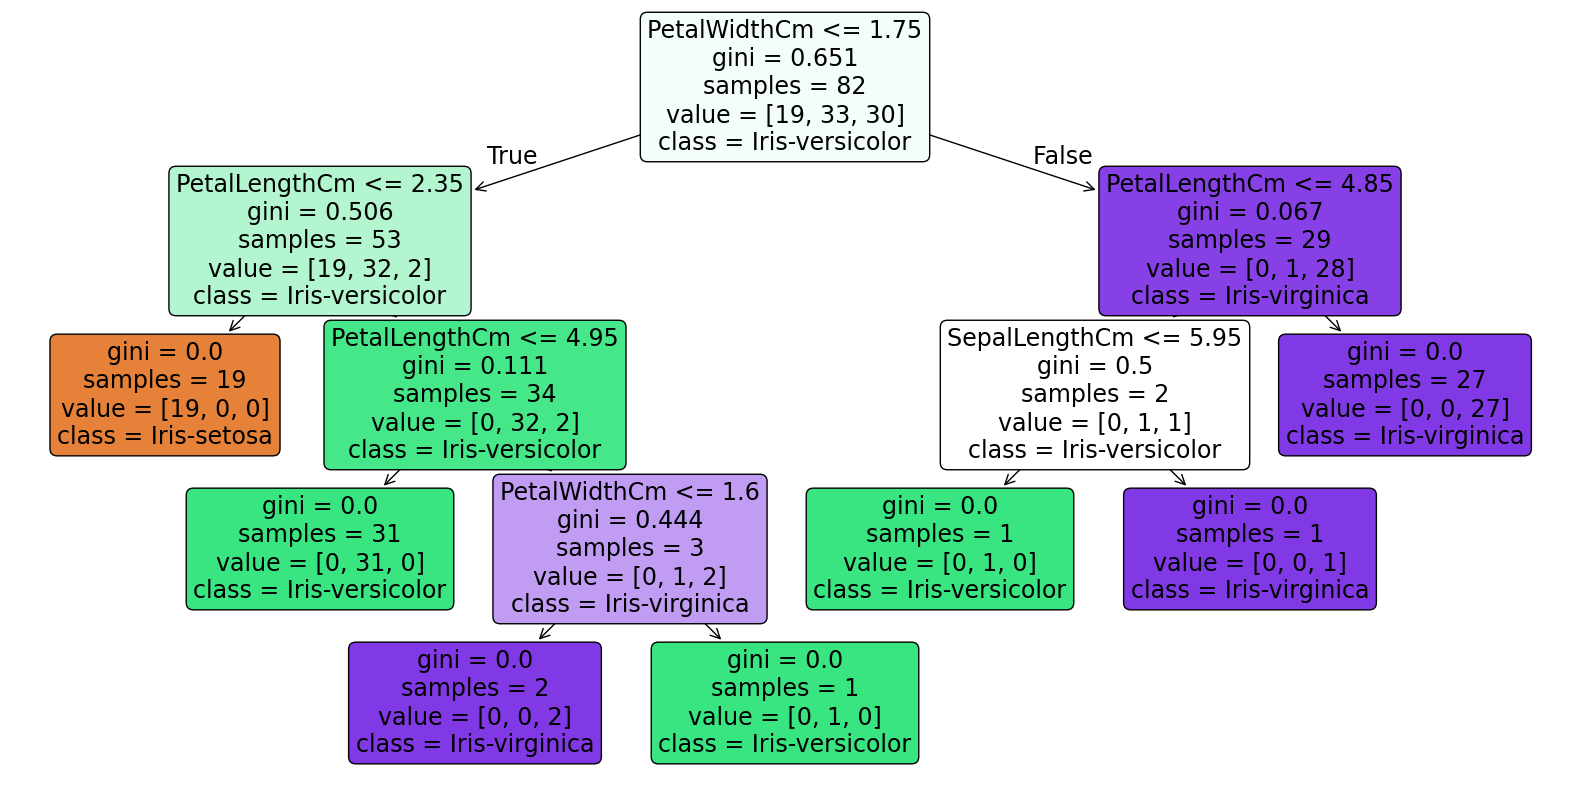

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20, 10))
plot_tree(
    fitting,
    feature_names=feature_cols,
    class_names=df['Species'].unique(),
    filled=True,
    rounded=True
)

# Save the plot as an image file
plt.savefig("decision_tree.png")  # Save with high resolution
plt.show()
